# Importamos las librerías a utilizar

In [28]:
#Para crear y análizar redes
import networkx as nx
#Para dibujary guardas gráficas de redes y funciones
import matplotlib.pyplot as plt

# Creación de la red

**ACTIVIDAD 1** Complete la siguiente lista de enlaces para representar la red de amistades de la Práctica 1.
Python distingue entre mayúsculas y minúsculas. 

In [29]:
lista_enlaces = [("Alicia","Beto"),
             ("Carlos","Alicia"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Beto","Jorge"),
             ("Jorge","Enrique"),
             ("Enrique","Rosa"),
             ("Rosa","Jorge"),
             ("Enrique","Irene"),
             ("Irene","Jorge"),
             ("Irene","Rosa"),
             ("Carmen","Monica"),
             ("David","Carlos"),
             ("Carlos","Monica"),
             ("Carmen","Irene")]

Creamos la red y la almacenamos en la variable G

In [30]:
G = nx.Graph(lista_enlaces)

# Informacion de la red
El siguiente codigo calcula la cantidad de nodos, enlaces y el diámetro de la red. Almacena estos dato en las variables n, m y d, repectivamente. Posteriormente se imprime la información

In [31]:
# nodos
n = len(nx.nodes(G))
# enlaces
m = len(nx.edges(G))
# diametro
d = nx.diameter(G)
print("Informacion de la red: \n- nodos = " + str(n) +
      "\n- enlaces = " + str(m) +
      "\n- diámetro = " + str(d) )

Informacion de la red: 
- nodos = 10
- enlaces = 16
- diámetro = 4


Los anteriores datos se pueden obtener usando la función info de networkx

In [32]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10\nNumber of edges: 16\nAverage degree:   3.2000'

## Dibujamos y guardamos la red

Dibujamos la red con nodos rosas y mostrando las etiquetas de los nodos. Depués, guardamos la red en el archivo amigos.png

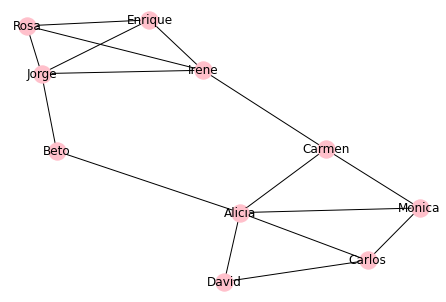

In [33]:
nx.draw(G,with_labels=True,node_color="pink")
plt.savefig("amigos.png")

**ACTIVIDAD 2** Dibuje la red con nodos azules y sin mostrar las etiquetas de nodos 

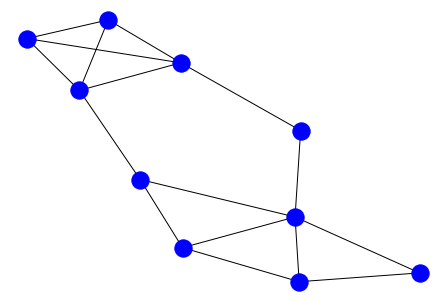

In [34]:
nx.draw(G,with_labels=False,node_color="blue")

**ACTIVIDAD 3** Dibuje la red con nodos verdes y mostrando las etiquetas de nodos 

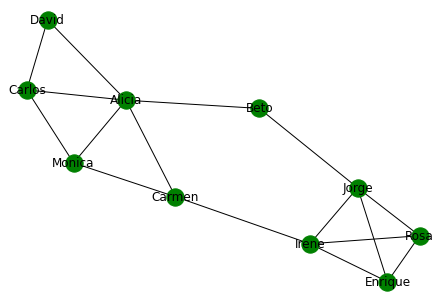

In [35]:
nx.draw(G,with_labels=True,node_color="green")

# Nodos y enlaces

## Nodos

Guardamos la lista de nodos en la variable nodos y la MOSTRAMOS

In [36]:
nodos = nx.nodes(G)
nodos

NodeView(('Alicia', 'Beto', 'Carlos', 'David', 'Carmen', 'Monica', 'Jorge', 'Enrique', 'Rosa', 'Irene'))

Guardamos el tamaño de la lista de enlaces en la variable n y la MOSTRAMOS

In [37]:
n = len(nodos)
n

10

## Enlaces

**ACTIVIDAD 4** Guarde la lista de enlaces en una variable enlaces y muestrela 

In [38]:
links= nx.edges(G)
links

EdgeView([('Alicia', 'Beto'), ('Alicia', 'Carlos'), ('Alicia', 'David'), ('Alicia', 'Carmen'), ('Alicia', 'Monica'), ('Beto', 'Jorge'), ('Carlos', 'David'), ('Carlos', 'Monica'), ('Carmen', 'Monica'), ('Carmen', 'Irene'), ('Jorge', 'Enrique'), ('Jorge', 'Rosa'), ('Jorge', 'Irene'), ('Enrique', 'Rosa'), ('Enrique', 'Irene'), ('Rosa', 'Irene')])

**ACTIVIDAD 5** Guarde el tamaño de la lista de enlaces en una variable m y muestrela

In [39]:
tam_Links= len(links)
tam_Links

16

# Distancias y caminos

## Distancia y camino entre 2 personas
La distancia entre 2 nodos es el la longitud del camino más corto
### Beto y Carlos
Calculamos uno de los caminos mas cortos entre Carlos e Irene y lo IMPRIMOS

In [40]:

camino = nx.shortest_path(G,"Carlos","Irene")
print("El camino más corto entre Carlos e Irene " + str(camino))

El camino más corto entre Carlos e Irene ['Carlos', 'Alicia', 'Carmen', 'Irene']


Calculamos la distancia entre Beto y Carlos y la IMPRIMOS

In [41]:
distancia = nx.shortest_path_length(G,"Carlos","Irene")
print("La distancia entre Carlos e Irene es " + str(distancia))

La distancia entre Carlos e Irene es 3


Calculamos TODOS los caminos mas cortos entre Carlos y Beto, los guardamos en la variable caminos

In [42]:
caminos = nx.all_shortest_paths(G,"Carlos","Irene")

Con ayuda de un ciclo for imprimos todos los caminos entre Carlos y Beto

In [43]:
for camino in caminos: 
    print("El camino más corto entre Carlos e Irene " + str(camino))

El camino más corto entre Carlos e Irene ['Carlos', 'Alicia', 'Carmen', 'Irene']
El camino más corto entre Carlos e Irene ['Carlos', 'Monica', 'Carmen', 'Irene']


## Funcion para mostrar los caminos (más cortos) y distancia

**ACTIVIDAD 6** Cree una función que recibe como parametros los nodos: nodo1 y nodo2 e imprime los caminos mas cortos entre ellos. La funcion devuelve la distancia entre el nodo1 y el nodo2

In [44]:
def Short_Path(Nodo1,Nodo2,Grafo):
    Spaths=nx.all_shortest_paths(Grafo,Nodo1,Nodo2)
    distancia = nx.shortest_path_length(Grafo,Nodo1,Nodo2)
    print("Los caminos entre " + Nodo1 +" y "+ Nodo2 +" son:")
    for path in Spaths:
        print(path)
    return distancia

**ACTIVIDAD 7** Llame a la función creada para mostrar los caminos mas cortos y la distnacia entre Carlos e Irene y entre Carlos y Enrique

In [45]:
print("La distancia entre Irene y Carlos es: " + str(Short_Path("Irene","Carlos",G)) )
print("##############################################################")
print("La distancia entre Carlos y Enrique es: " + str(Short_Path("Carlos","Enrique",G)) )

Los caminos entre Irene y Carlos son:
['Irene', 'Carmen', 'Alicia', 'Carlos']
['Irene', 'Carmen', 'Monica', 'Carlos']
La distancia entre Irene y Carlos es: 3
##############################################################
Los caminos entre Carlos y Enrique son:
['Carlos', 'Alicia', 'Beto', 'Jorge', 'Enrique']
['Carlos', 'Alicia', 'Carmen', 'Irene', 'Enrique']
['Carlos', 'Monica', 'Carmen', 'Irene', 'Enrique']
La distancia entre Carlos y Enrique es: 4


## Funcion para calcular la distancia promedio y diametro de una red

**ACTIVIDAD 8** Cree una funcion recibe como parametros una red G, que imprima el diámetro y la distancia promedio de G. La funcion debe devolver la distancia promedio de G

In [46]:
def distancia_promedio(Grafo):
    print("La distancia primedio de la red es: "+str(nx.average_shortest_path_length(Grafo)))
    print("El diámetro de la red es: "+ str(nx.diameter(Grafo)))
  

**ACTIVIDAD 9** Llame a la función de la actividad 8, para imprimir el diámetro y la distancia de la red creada

In [47]:
distancia_promedio(G)  

La distancia primedio de la red es: 2.022222222222222
El diámetro de la red es: 4


# Grado nodal
Indica el número de enlaces de un nodo

**ACTIVIDAD 10** Cree una función que reciba el parametro nodo e imprima el nombre del nodo y su grado nodal

In [48]:
def info_node(Nodo):
    print("El nombre del nodo es: "+str(Nodo[0]) +" El grado nodal es: "+str(len(Nodo[1])) )

**ACTIVIDAD 11** Itere todos los nodos de la red y para cada uno de ellos llame a la función de la actividad 10 para imprimir su grado nodal

In [49]:

nodos=nx.nodes(G)
for nn in nodos:
    nodo=(nn,nx.edges(G,nn))
    info_node(nodo)


    


El nombre del nodo es: Alicia El grado nodal es: 5
El nombre del nodo es: Beto El grado nodal es: 2
El nombre del nodo es: Carlos El grado nodal es: 3
El nombre del nodo es: David El grado nodal es: 2
El nombre del nodo es: Carmen El grado nodal es: 3
El nombre del nodo es: Monica El grado nodal es: 3
El nombre del nodo es: Jorge El grado nodal es: 4
El nombre del nodo es: Enrique El grado nodal es: 3
El nombre del nodo es: Rosa El grado nodal es: 3
El nombre del nodo es: Irene El grado nodal es: 4


## Distribucion de grados

Calculamos la distribución de grados

In [50]:
dist_grados = nx.degree_histogram(G)
print(dist_grados)

[0, 0, 2, 5, 2, 1]


El resultado anterior nos indica que hay

- 0 nodos de grado 0
- 0 nodos de grado 1
- 2 nodos de grado 2
- 5 nodos de grado 3
- 2 nodos de grado 2
- 1 nodo de grado 1

**ACTIVIDAD 12** Cree una función que se llame graficar_distr_grado, la función debe recibir como parámetro una red G. La función calcula la distribución de grados, la grafica y la almacena en una imágen dist_grado.png. Finalmente la función devuelve la lista que almacena la distribución de grado. 

Para realizar la grafica utilice la librería matplotlib. La grafica debe titularse "Distribución de grados", el eje x se debe etiquetar como "grado" y el eje y como "número de nodos"

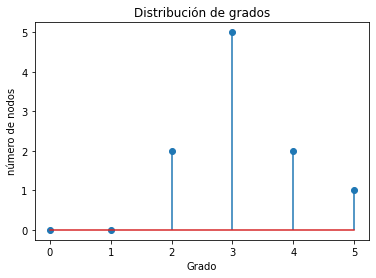

In [109]:
def graficar_distr_grado(G):
    dist_grados = nx.degree_histogram(G)
    #X=[x for x in range(len(dist_grados))]
    #plt.scatter(X,dist_grados,color="r")
    plt.stem(dist_grados)
    plt.title("Distribución de grados")
    plt.xlabel("Grado")
    plt.ylabel("número de nodos")
    plt.savefig("dist_grado.png")
graficar_distr_grado(G)

## Grado promedio de la red

**ACTIVIDAD 13** Cree una función que se llame grado_promedio de la red, la función debe recibir como parámetro una red G. La función calcula el grado promedio de la red, lo imprime y lo devuleve

In [85]:

def grado_promedio(G):
    
    gp=nx.degree(G)
    sum=0
    for x in gp:
        sum+=x[1]
    print("El grado promedio de la red es: "+str(sum/len(gp)))

**ACTIVIDAD 14** Llame a la función anterior pasandole como parámetro la gráfica G

In [101]:

grado_promedio(G)

El grado promedio de la red es: 3.2


# Densidad de la red
Proporcion de nodos que tiene con respecto a los que podría tener (es decir los que tiene la red completa)

## Red completa

Usando NetworkX creamos una red completa de 10 nodos (recuerde que la variable n se declaro más arriba guarda el numero 10) y la almacena en la variable Kn

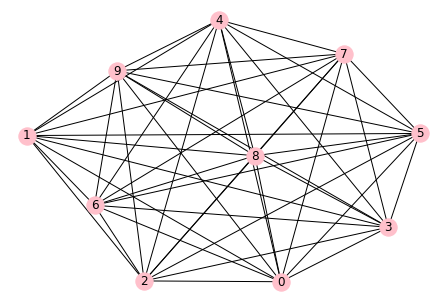

In [87]:
kn = nx.complete_graph(n)
nx.draw(kn,with_labels=True,node_color="pink")
plt.savefig("completa.png")

 **ACTIVIDAD 8** Calcule la densidad de la red G de 10 nodos usando la red Kn que acaba de crear

In [89]:
print("La densidad de la red Kn es: "+str(nx.density(kn)))

La densidad de la red Kn es: 1.0


Calculamos la densidad usando NetworkX

In [90]:
densidad = nx.density(G)
print("La densidad de la red es " + str(densidad))

La densidad de la red es 0.35555555555555557
